In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import shutil
import cv2
import matplotlib.pyplot as plt

In [47]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dropout,Flatten,Dense

In [2]:
classes= ['nv','mel','bkl','bcc','akiec','vasc','df']
base_dir="dataSet"
train_dir="train_dir"
test_dir="test_dir"

In [3]:
x_train=[]
y_train=[]

for i in classes:
    path=os.path.join(os.getcwd(),base_dir,train_dir,i)
    f=os.listdir(path)
    for imgs in f:
        show_img=cv2.imread(os.path.join(path,imgs))
        show_img=cv2.resize(show_img,(28,28))
        x_train.append(show_img)
        y_train.append(i)
        

In [4]:
x_train_n=np.array(x_train)
y_train_n=np.array(y_train)

In [5]:
print(x_train_n.shape)
print(y_train_n.shape)


(9013, 28, 28, 3)
(9013,)


In [53]:
x_test=[]
y_test=[]

for i in classes:
    path=os.path.join(os.getcwd(),base_dir,test_dir,i)
    f=os.listdir(path)
    for imgs in f:
        show_img=cv2.imread(os.path.join(path,imgs))
        show_img=cv2.resize(show_img,(28,28),interpolation=cv2.INTER_AREA)
        x_test.append(show_img)
        y_test.append(i)

In [54]:
x_test_n=np.array(x_test)
y_test_n=np.array(y_test)

In [55]:
print(x_test_n.shape)
print(y_test_n.shape)

(1002, 28, 28, 3)
(1002,)


In [56]:
y_test_n =pd.get_dummies(y_test_n)
y_train_n =pd.get_dummies(y_train_n)

In [57]:
print(y_test_n.shape)
print(y_train_n.shape)

(1002, 7)
(9013, 7)


In [58]:
def preprocess(img):
    img = img/255
    return img

x_test_n = np.array(list(map(preprocess, x_test_n)))
x_train_n = np.array(list(map(preprocess, x_train_n)))

In [62]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512,activation='sigmoid'))
model.add(Dense(7,activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
__________

In [63]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=x_train_n,y=y_train_n,verbose=1,batch_size=128,epochs=20,shuffle='True',validation_data=(x_test_n,y_test_n))

Train on 9013 samples, validate on 1002 samples
Epoch 1/20
9013/9013 [==============================] - 11s 1ms/step - loss: 1.0800 - acc: 0.6590 - val_loss: 0.9593 - val_acc: 0.6697
Epoch 2/20
9013/9013 [==============================] - 9s 965us/step - loss: 0.9430 - acc: 0.6781 - val_loss: 0.9863 - val_acc: 0.6377
Epoch 3/20
9013/9013 [==============================] - 8s 923us/step - loss: 0.9143 - acc: 0.6780 - val_loss: 0.9620 - val_acc: 0.6367
Epoch 4/20
9013/9013 [==============================] - 9s 1ms/step - loss: 0.8940 - acc: 0.6816 - val_loss: 0.8888 - val_acc: 0.6786
Epoch 5/20
9013/9013 [==============================] - 9s 984us/step - loss: 0.8847 - acc: 0.6808 - val_loss: 0.9580 - val_acc: 0.6856
Epoch 6/20
9013/9013 [==============================] - 8s 929us/step - loss: 0.8580 - acc: 0.6888 - val_loss: 0.8498 - val_acc: 0.6966
Epoch 7/20
9013/9013 [==============================] - 9s 992us/step - loss: 0.8487 - acc: 0.6894 - val_loss: 0.9153 - val_acc: 0.6776
Epo

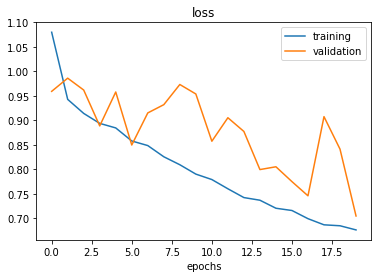

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'])

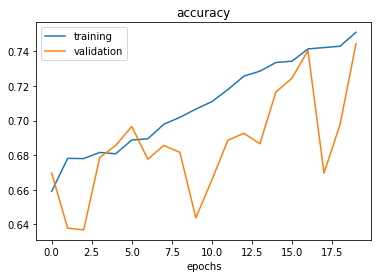

In [68]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['training','validation'])

In [71]:
score=model.evaluate(x_test_n,y_test_n,verbose=0)
print(" test score: {} ".format(score[0]))
print("test accuracy: {}".format(score[1]))

 test score: 0.7048806539790597 
test accuracy: 0.7445109780439122
